<a href="https://colab.research.google.com/github/nicorunini/CCMACLRL_EXERCISES_COM232/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Using k-Nearest Neighbours, predict if a student will **Pass (1)** or **Fail (0)** based on:

- $X_1$ = Hours Studied
- $X_2$ = Sleep Hours

---

## Training Data (10 Students)

| Student | Hours Studied $X_1$ | Sleep Hours $X_2$ | Pass/Fail (Y) |
| ------- | ------------------- | ----------------- | ------------- |
| 1       | 1.0                 | 5.0               | 0 (Fail)      |
| 2       | 2.0                 | 5.5               | 0 (Fail)      |
| 3       | 3.0                 | 6.0               | 0 (Fail)      |
| 4       | 4.5                 | 5.0               | 0 (Fail)      |
| 5       | 5.0                 | 6.5               | 1 (Pass)      |
| 6       | 5.5                 | 7.0               | 1 (Pass)      |
| 7       | 6.0                 | 6.0               | 1 (Pass)      |
| 8       | 7.0                 | 7.0               | 1 (Pass)      |
| 9       | 8.0                 | 6.0               | 1 (Pass)      |
| 10      | 9.0                 | 7.5               | 1 (Pass)      |

---

## Task

A new student studied **4 hours** and slept **6 hours**.  
We want to predict whether they **Pass** or **Fail** using **KNN with k = 3**.

---

## 1. Plot all data points using a scatter plot (10 points)

- Use a circle 🔵 for students who failed.
- Use a square 🟥 for students who passed.
- Use a star ⭐ for the unknown data point.





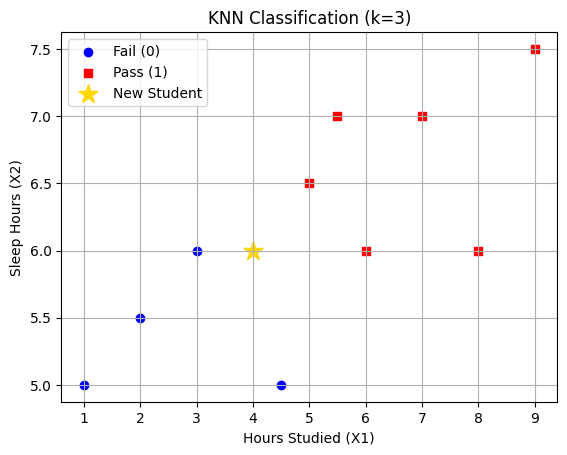

In [1]:
import matplotlib.pyplot as plt

# Dataset: [Hours Studied, Sleep Hours, Pass/Fail]
students = [
    [1.0, 5.0, 0],
    [2.0, 5.5, 0],
    [3.0, 6.0, 0],
    [4.5, 5.0, 0],
    [5.0, 6.5, 1],
    [5.5, 7.0, 1],
    [6.0, 6.0, 1],
    [7.0, 7.0, 1],
    [8.0, 6.0, 1],
    [9.0, 7.5, 1]
]


new_student = [4.0, 6.0]


fail_points = [s for s in students if s[2] == 0]
pass_points = [s for s in students if s[2] == 1]


plt.scatter([p[0] for p in fail_points], [p[1] for p in fail_points],
            color='blue', marker='o', label='Fail (0)')

plt.scatter([p[0] for p in pass_points], [p[1] for p in pass_points],
            color='red', marker='s', label='Pass (1)')


plt.scatter(new_student[0], new_student[1], color='gold', marker='*', s=200, label='New Student')


plt.xlabel('Hours Studied (X1)')
plt.ylabel('Sleep Hours (X2)')
plt.title('KNN Classification (k=3)')
plt.legend()
plt.grid(True)


plt.show()



## 2. Compute Distances (10 points)

**Note:** Please show all solutions

For the new student, compute the **Euclidean distance** from all data points:

$$
d = \sqrt{(X_1 - 4)^2 + (X_2 - 6)^2}
$$

Fill in the table below:

| Student | Hours Studied (X1) | Sleep Hours (X2) | Pass/Fail (Y) | Euclidean Distance |
| ------- | ------------------ | ---------------- | ------------- | ------------------ |
| 1       | 1.0                | 5.0              | 0             | 3.16                  |
| 2       | 2.0                | 5.5              | 0             | 2.06               |
| 3       | 3.0                | 6.0              | 0             | 1.00                 |
| 4       | 4.5                | 5.0              | 0             | 1.12                |
| 5       | 5.0                | 6.5              | 1             | 1.12                |
| 6       | 5.5                | 7.0              | 1             | 1.80                  |
| 7       | 6.0                | 6.0              | 1             | 2.00                  |
| 8       | 7.0                | 7.0              | 1             | 3.16                  |
| 9       | 8.0                | 6.0              | 1             | 4.00                  |
| 10      | 9.0                | 7.5              | 1             | 5.22                  |



**Solution**

1. **Student 1**: (1.0, 5.0): $\sqrt{(1-4)^2 + (5-6)^2}$ = $\sqrt{9 + 1}$ = $\sqrt{10}$ = 3.16  
2. **Student 2**: (2.0, 5.5): $\sqrt{(2-4)^2 + (5.5-6)^2}$ = $\sqrt{4 + 0.25}$ = $\sqrt{4.25}$ = 2.06  
3. **Student 3**: (3.0, 6.0): $\sqrt{(3-4)^2 + (6-6)^2}$ = $\sqrt{1 + 0}$ = $\sqrt{1}$ = 1.00  
4. **Student 4**: (4.5, 5.0): $\sqrt{(4.5-4)^2 + (5-6)^2}$ = $\sqrt{0.25 + 1}$ = $\sqrt{1.25}$ = 1.12  
5. **Student 5**: (5.0, 6.5): $\sqrt{(5-4)^2 + (6.5-6)^2}$ = $\sqrt{1 + 0.25}$ = $\sqrt{1.25}$ = 1.12  
6. **Student 6**: (5.5, 7.0): $\sqrt{(5.5-4)^2 + (7-6)^2}$ = $\sqrt{2.25 + 1}$ = $\sqrt{3.25}$ = 1.80  
7. **Student 7**: (6.0, 6.0): $\sqrt{(6-4)^2 + (6-6)^2}$ = $\sqrt{4 + 0}$ = $\sqrt{4}$ = 2.00  
8. **Student 8**: (7.0, 7.0): $\sqrt{(7-4)^2 + (7-6)^2}$ = $\sqrt{9 + 1}$ = $\sqrt{10}$ = 3.16  
9. **Student 9**: (8.0, 6.0): $\sqrt{(8-4)^2 + (6-6)^2}$ = $\sqrt{16 + 0}$ = $\sqrt{16}$ = 4.00  
10. **Student 10**: (9.0, 7.5): $\sqrt{(9-4)^2 + (7.5-6)^2}$ = $\sqrt{25 + 2.25}$ = $\sqrt{27.25}$ = 5.22  


## 2. Find the 3 Nearest Neighbors (3 points)

- Highlight the rows with the **3 smallest distances**.

| Student | Hours Studied (X1) | Sleep Hours (X2) | Pass/Fail (Y) | Euclidean Distance |
| ------- | ------------------ | ---------------- | ------------- | ------------------ |
| 1       | 1.0                | 5.0              | 0             | 3.16                  |
| 2       | 2.0                | 5.5              | 0             | 2.06               |
| 3       | 3.0                | 6.0              | 0             | 1.00                 |
| 4       | 4.5                | 5.0              | 0             | 1.12                |
| 5       | 5.0                | 6.5              | 1             | 1.12                |
| 6       | 5.5                | 7.0              | 1             | 1.80                  |
| 7       | 6.0                | 6.0              | 1             | 2.00                  |
| 8       | 7.0                | 7.0              | 1             | 3.16                  |
| 9       | 8.0                | 6.0              | 1             | 4.00                  |
| 10      | 9.0                | 7.5              | 1             | 5.22                  |



**Answer**


| Student | Hours Studied (X1) | Sleep Hours (X2) | Pass/Fail (Y) | Euclidean Distance |
| ------- | ------------------ | ---------------- | ------------- | ------------------ |
| 3       | 3.0                | 6.0              | 0             | 1.00               |
| 4       | 4.5                | 5.0              | 0             | 1.12                |
| 5       | 5.0                | 6.5              | 1             | 1.12                |




## 3. Majority Vote (2 points)

- Count how many are **Pass (1)** and how many are **Fail (0)**.
- Predict the outcome for the new student.



| Student | Hours Studied (X1) | Sleep Hours (X2) | Pass/Fail (Y) | Euclidean Distance |
| ------- | ------------------ | ---------------- | ------------- | ------------------ |
| 3       | 3.0                | 6.0              | 0             | 1.00               |
| 4       | 4.5                | 5.0              | 0             | 1.12                |
| 5       | 5.0                | 6.5              | 1             | 1.12                |



*  passed: 1
*  failed: 2



**Prediction:** A new student who studied 4 hours and slept 6 hours will **Fail** the exam.



---

## 4. Discussion Questions (5 points)

1. What was your final prediction?
- the student will likely fail
2. How would the prediction change if we used **k = 5** instead of **k = 3**?
- **yes**, because in k=5 the majority of students passed, so likely the prediction will change to zccordingly.